<a href="https://colab.research.google.com/github/miraclehimself/Advanced_ML/blob/main/Clustering_with_K_Means_week9a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(
    style='ticks',
    context='talk',
    font_scale=0.8,
    rc={'figure.figsize': (8,6)}
)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
!pip install --upgrade scikit-learn -q --user

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
penguins = sns.load_dataset('penguins').dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
penguins.shape

(333, 7)

In [ ]:
X = penguins.drop(columns=['species', 'island', 'sex'])

In [ ]:
X.head(1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0


In [ ]:
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

In [ ]:
X.head(1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475


In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto').fit(X)
y_pred = kmeans.predict(X)

In [ ]:
y_pred[:5]

array([2, 2, 2, 2, 2], dtype=int32)

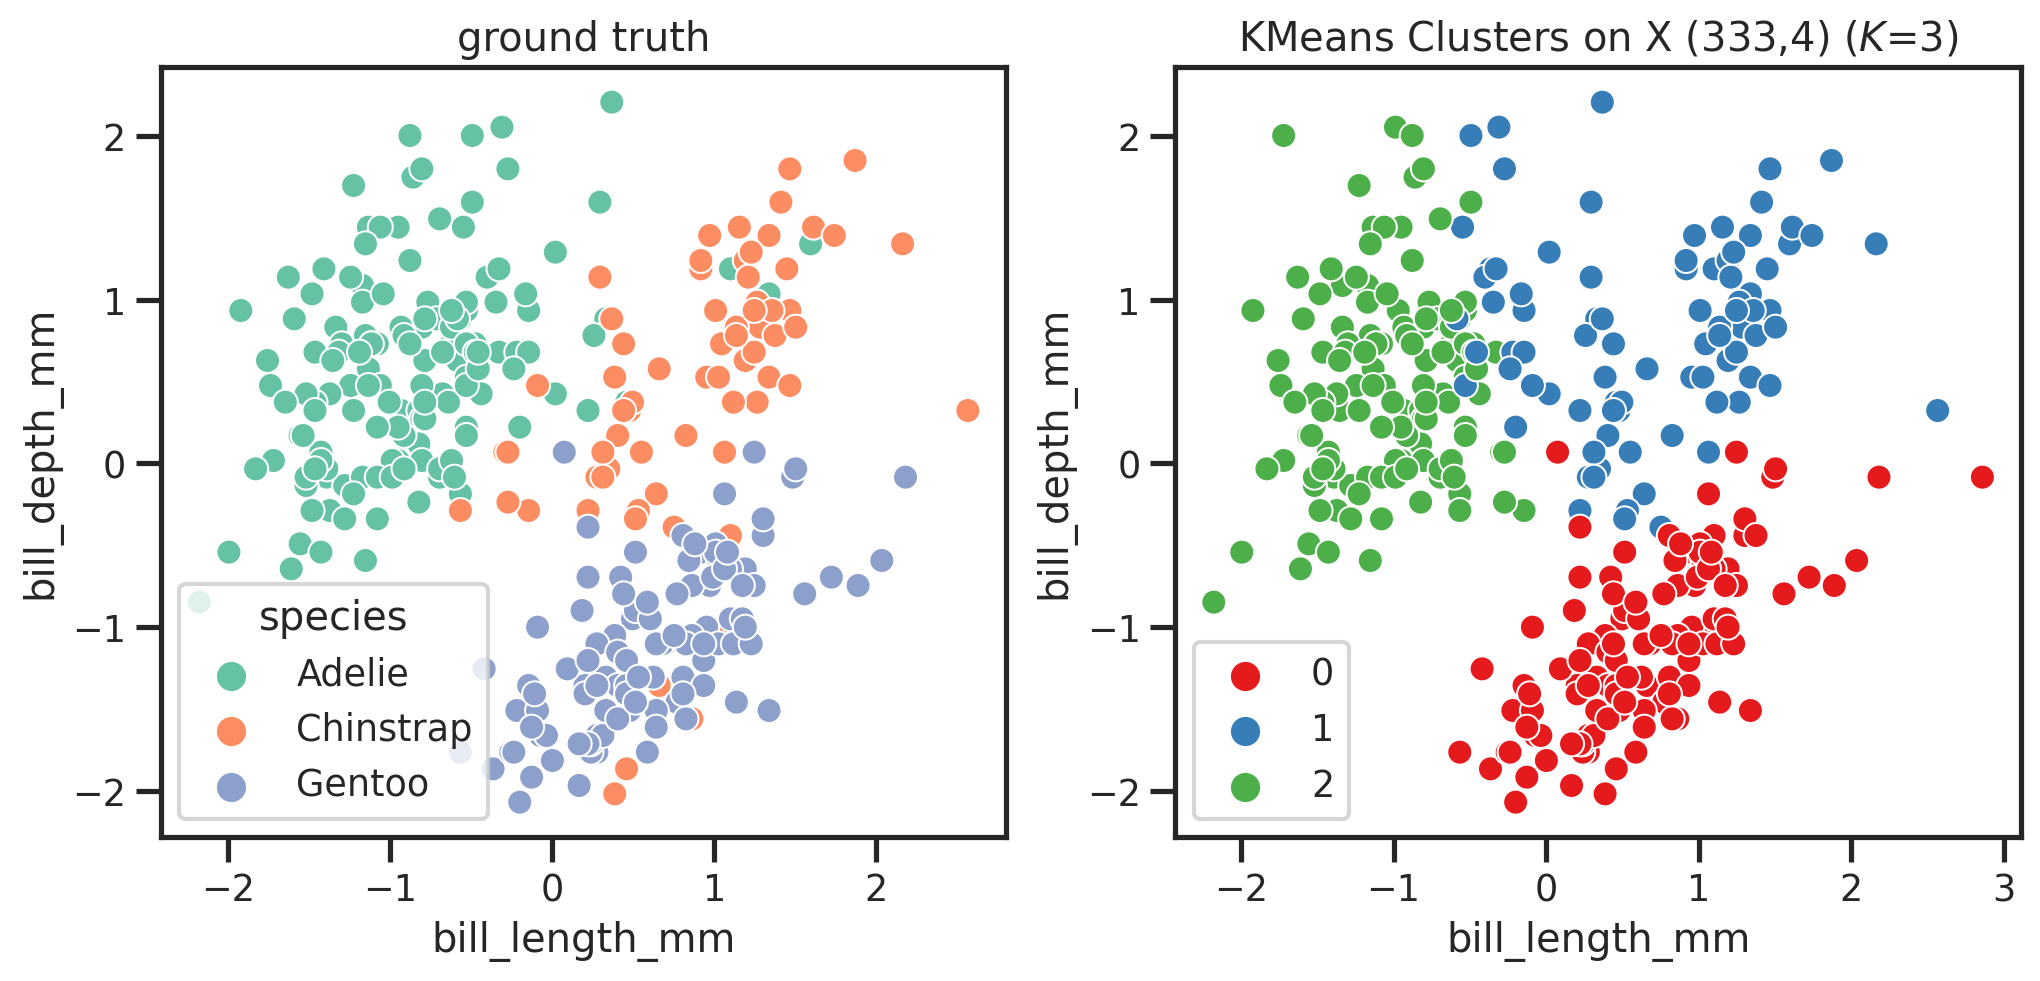

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title('ground truth')
sns.scatterplot(
    x=X['bill_length_mm'], y=X['bill_depth_mm'], hue=penguins['species'],
    palette='Set2', ax=axs[0]
)
axs[1].set_title('KMeans Clusters on X (333,4) ($K$=3)')
sns.scatterplot(
    x=X['bill_length_mm'], y=X['bill_depth_mm'], hue=y_pred,
    palette='Set1', ax=axs[1]
);